**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
![art8.png](art8.png)
art8lab1.png: 
![art8lab1.png](art8lab1.png)
art8lab2.png: 
![art8lab2.png](art8lab2.png)
		

28


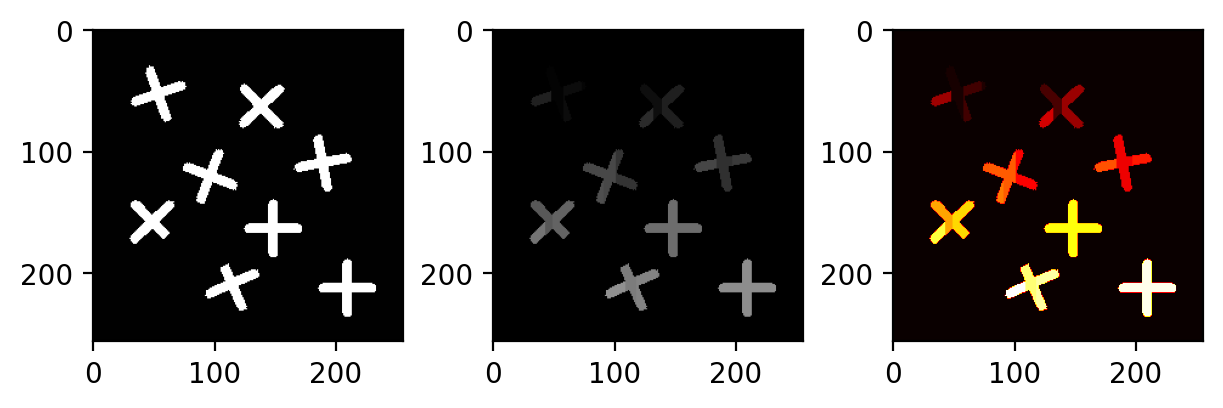

In [3]:
# code here
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

def juntarTuplas(lista):
    """
    valores = defaultdict(list)
    for key, val in lista:
        valores[key].append(val)
    return [(key, *val) for key, val in valores.items()]
    """
    vistos = iguaisDesseNumero = equivalentes = []
    for tupla in lista:
        for numero in tupla:
            iguaisDesseNumero = []
            vistos.append(numero)
            for tupla in lista:
                if numero in tupla:
                    equivalente = tupla[0] if numero == tupla[0] else tupla[1]
                    if equivalente not in vistos:
                        iguaisDesseNumero.append(equivalente)
            equivalentes.append((numero, iguaisDesseNumero))
    return equivalentes

def colorirPorLinha(img):
    """
    colorindo considerando vizinhança 4 e checando somente vizinhos de cima e anterior
    """
    i = j = novo = corAtual = 0
    fundo = 1
    equivalencias = []
    resultado = np.zeros(img.shape)
    for linha in img:
        j = 0
        for col in linha:
            if img[i,j] == fundo:
                j += 1
                continue
            novo = True
            # lateral diferente de fundo
            if img[i-1,j] != fundo:
                resultado[i,j] = resultado[i-1,j]
                novo = False
            # de cima diferente de fundo
            if img[i,j-1] != fundo:
                if novo:
                    resultado[i,j] = resultado[i,j-1]
                    novo = False
                elif resultado[i-1,j] == resultado[i,j-1]:
                    resultado[i,j] = resultado[i-1, j]
                else:
                    resultado[i,j] = resultado[i-1, j]
                    corLateral = int(resultado[i-1,j])
                    corCima = int(resultado[i,j-1])
                    item = (corLateral, corCima) if corLateral <= corCima else (corCima, corLateral)
                    if item not in equivalencias:
                        equivalencias.append(item)
            # de cima e lateral for fundo mas atual for diferente de fundo
            if novo:
                corAtual += 1
                resultado[i,j] = corAtual
            j += 1
        i += 1
    
    for i,j in equivalencias:
        resultado[resultado == i] = j
    
    return resultado

resultado = colorirPorLinha(img)
cores = np.unique(resultado)
print(len(cores))
#plt.imshow(resultado)
fig, axes = plt.subplots(1,3, layout="constrained")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(resultado, cmap='gray', vmin=0, vmax=255)
axes[2].imshow(resultado, cmap='hot')

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

1


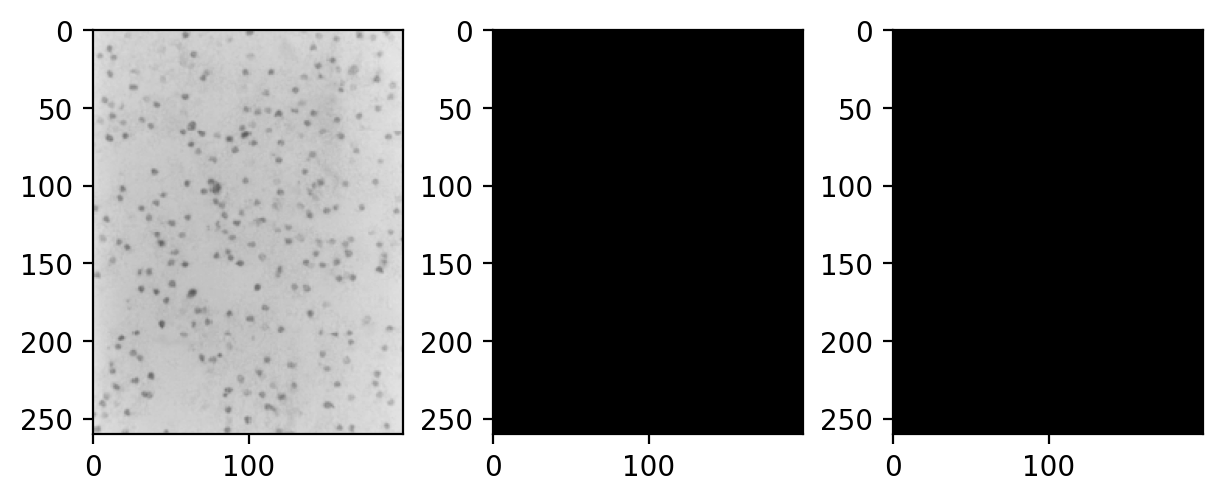

In [4]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

img_original = np.copy(img)

threshold = 67
img[img < threshold+1] = 1
img[img > threshold] = 0

def colorirPorLinha(img):
    """
    colorindo considerando vizinhança 4 e checando somente vizinhos de cima e anterior
    """
    i = j = novo = cores = 0
    fundo = 0
    equivalencias = []
    resultado = np.zeros(img.shape)
    for linha in img:
        j = 0
        for col in linha:
            novo = True
            if img[i-1,j] != fundo and img[i,j] != fundo:
                resultado[i,j] = cores
                novo = False
            if img[i,j-1] != fundo and img[i,j] != fundo:
                resultado[i,j] = cores
                if novo:
                    novo = False
                else:
                    antigaCor = int(resultado[i-1,j])
                    item = (antigaCor, cores)
                    if item not in equivalencias and antigaCor != cores:
                        equivalencias.append(item)
            if img[i,j] != fundo and novo:
                cores += 1
                resultado[i,j] = cores
            j += 1
        i += 1
    
    for i,j in equivalencias:
        resultado[resultado == i] = j
    
    return resultado

resultado = colorirPorLinha(img)
cores = np.unique(resultado)
print(len(cores))
#plt.imshow(resultado)
fig, axes = plt.subplots(1,3, layout="constrained")
axes[0].imshow(img_original, cmap='gray', vmin=0, vmax=256)
axes[1].imshow(img, cmap='gray', vmin=0, vmax=1)
axes[2].imshow(resultado, cmap='gray', vmin=0, vmax=255)